In [9]:
import assistant
from openai import OpenAI
from IPython.display import Image

In [2]:
client = OpenAI()

In [3]:
thread = client.beta.threads.create()
thread.id

'thread_HapsCvw6XlSPryKFHzma2rD6'

In [4]:
assistant_id = 'asst_MNdpNOqw6o9LFi9LiP4ejH5y'
thread_id = thread.id
thread = client.beta.threads.retrieve(thread_id)

In [5]:
prompt = "Give me a normalized chart of the performance of NVDA and SPY over the past 2 months for $1000."

In [6]:
response = assistant.run_prompt(client, assistant_id, thread, prompt)

run is: queued
handling action
running function: stock_prices
with arguments: 
{'tickers': 'NVDA,SPY', 'start': '2023-11-01'}
calling function
[*********************100%%**********************]  2 of 2 completed
received output of: 
{"NVDA":{"1698796800000":423.2127990723,"1698883200000":435.0217590332,"1698969600000":450.0104064941,"1699228800000":457.4697875977,"1699315200000":459.5095825195,"1699401600000":465.6990356445,"1699488000000":469.4587097168,"1699574400000":483.3075256348,"1699833600000":486.1572570801,"1699920000000":496.5163269043,"1700006400000":488.8370361328,"1700092800000":494.7565002441,"1700179200000":492.9366760254,"1700438400000":504.0456848145,"1700524800000":499.3960876465,"1700611200000":487.1171875,"1700784000000":477.7180175781,"1701043200000":482.3775939941,"1701129600000":478.1679382324,"1701216000000":481.3576660156,"1701302400000":467.6589050293,"1701388800000":467.6088867188,"1701648000000":455.0599975586,"1701734400000":465.6600036621,"1701820800000":4

In [7]:
response

ThreadMessage(id='msg_gyI3CR0IfO84r4TDqvz4GCAj', assistant_id='asst_MNdpNOqw6o9LFi9LiP4ejH5y', content=[MessageContentImageFile(image_file=ImageFile(file_id='file-peO7MEnENcRhJ5z9nXzwPa6u'), type='image_file'), MessageContentImageFile(image_file=ImageFile(file_id='file-I1TSUzjXneugQyQJdcCBDb6U'), type='image_file'), MessageContentText(text=Text(annotations=[], value="Here is the normalized chart depicting the performance of NVDA and SPY stocks over the past 2 months for an initial investment of $1000:\n\nFrom the chart, we can observe that both stocks have shown some level of volatility over the two-month period. It's important to note that the prices have been normalized to represent what $1000 invested at the start of the two-month window would look like over time.\n\nNVDA stock seems to be more volatile as compared to SPY, which seems to show a more consistent upward trend over these two months. However, NVDA also seems to have given higher returns compared to SPY.\n\nPlease let me 

it's an image


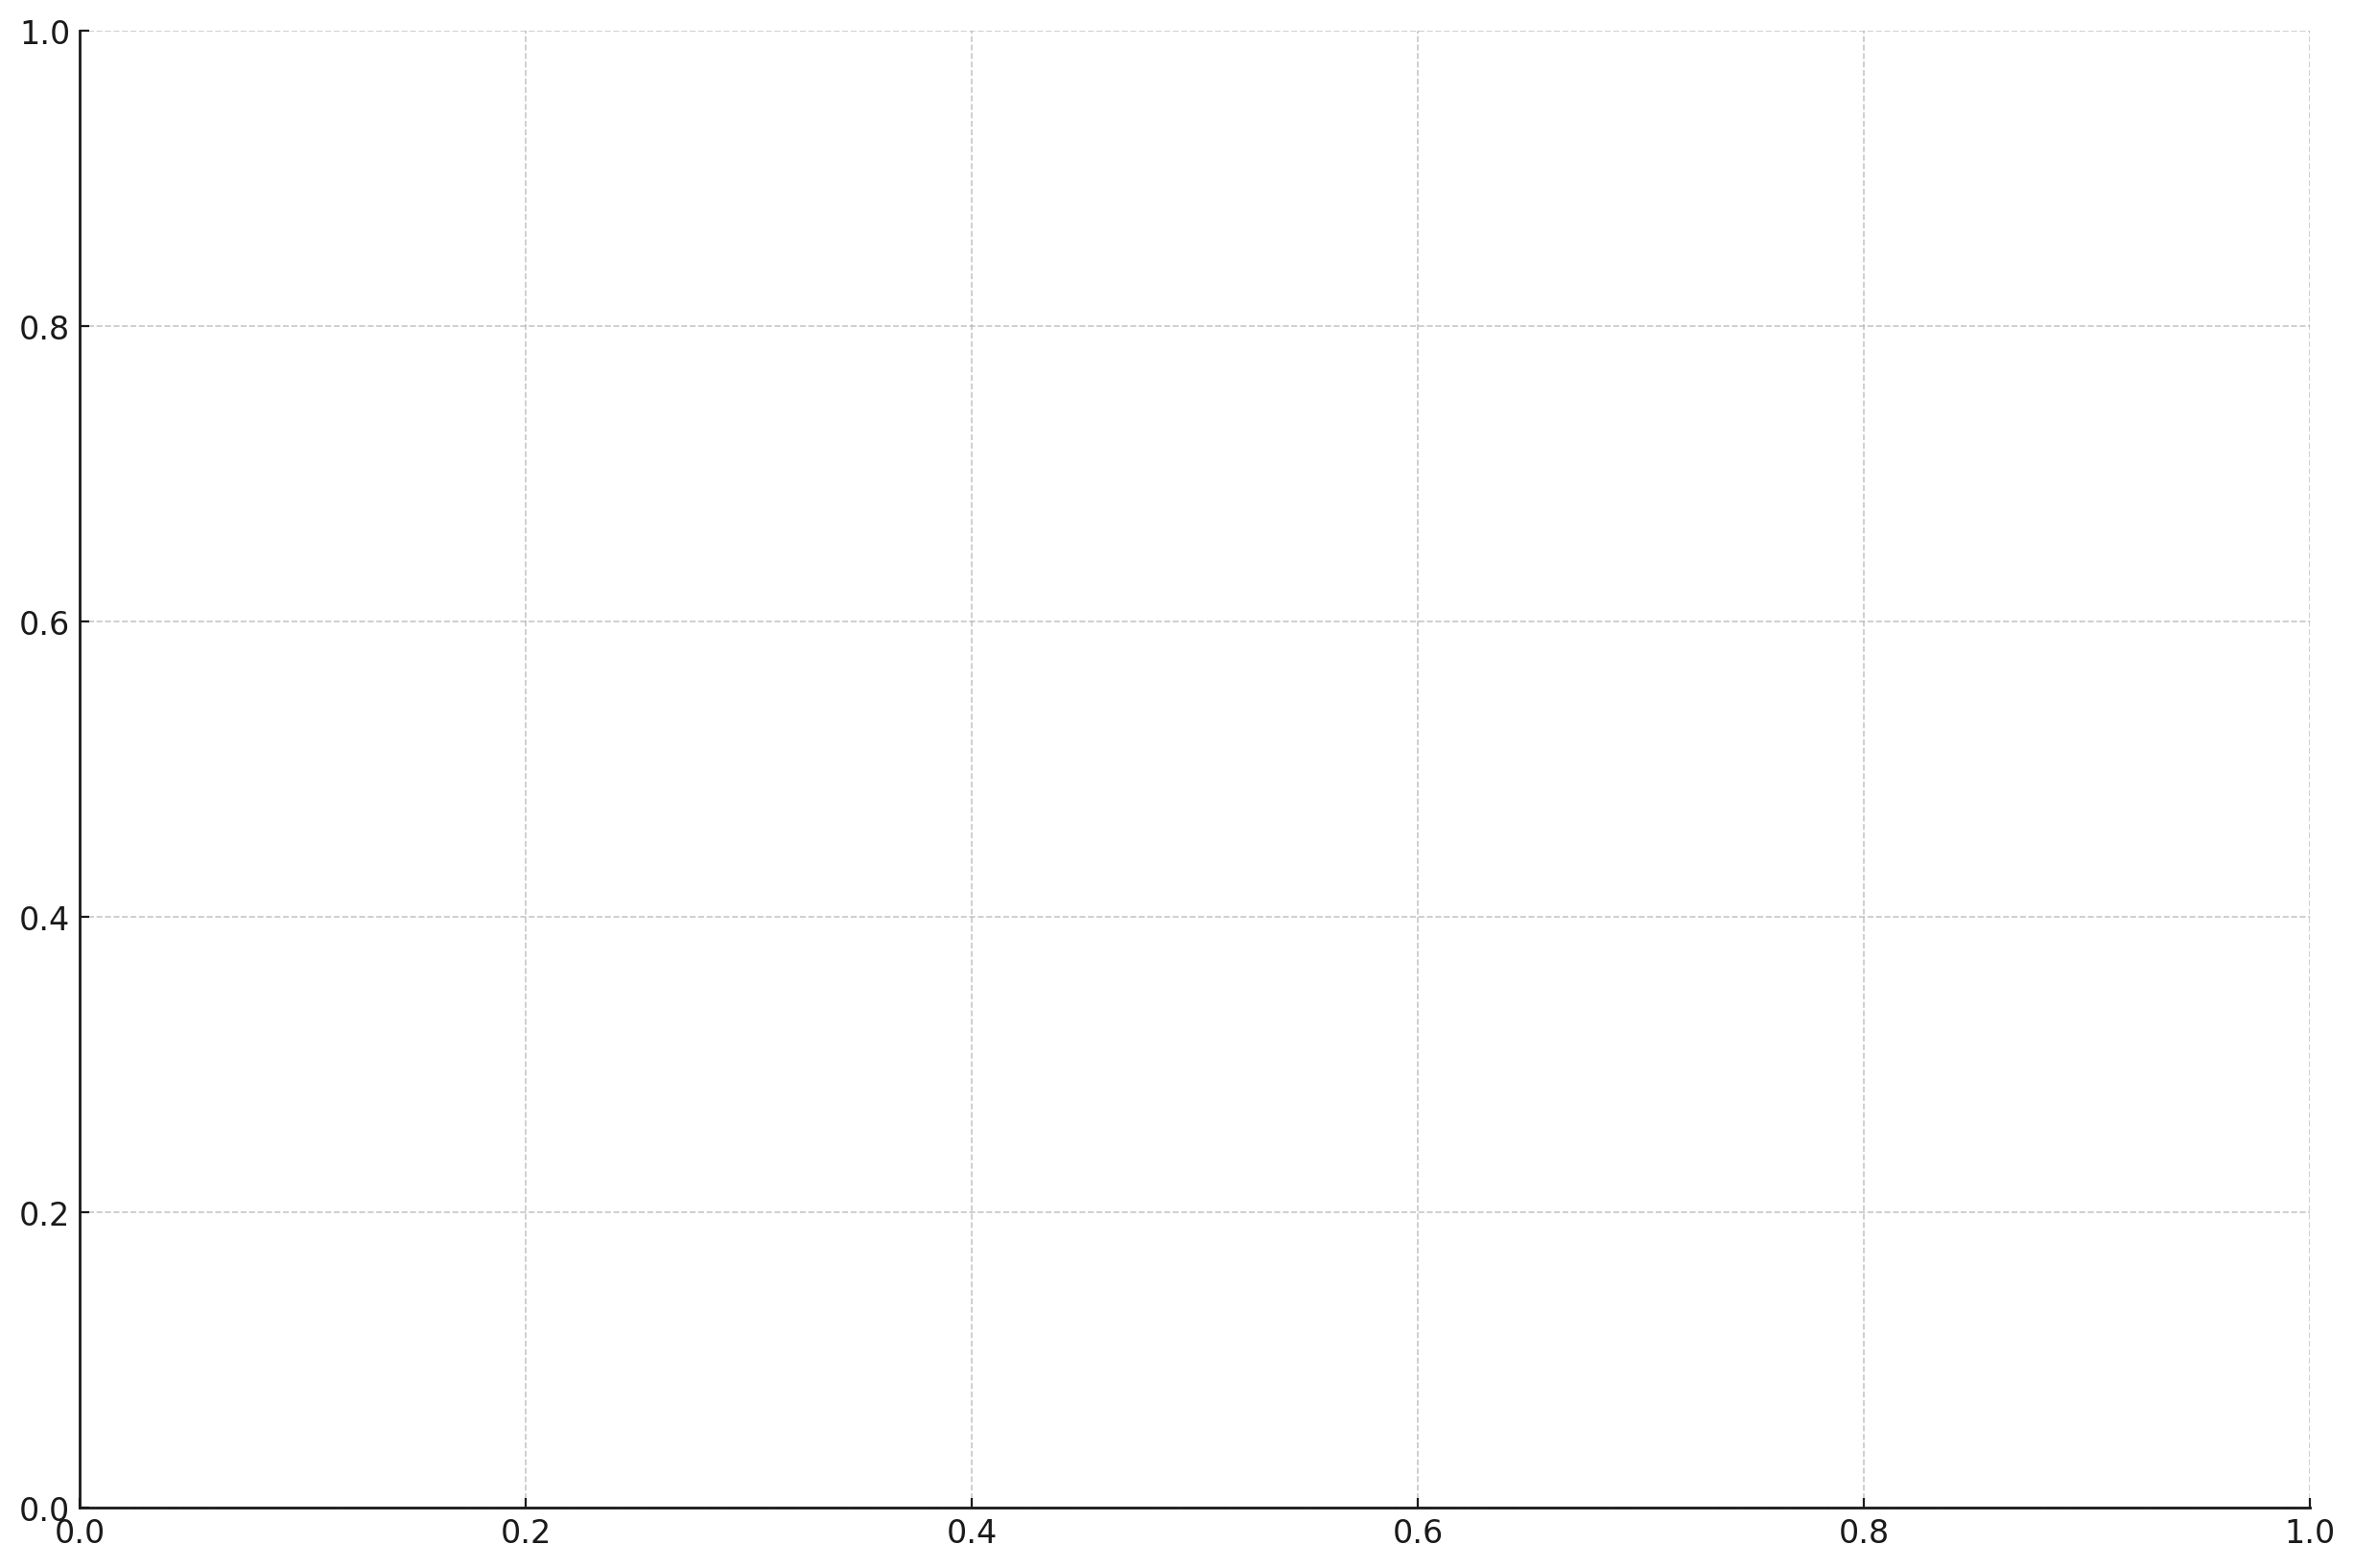

it's an image


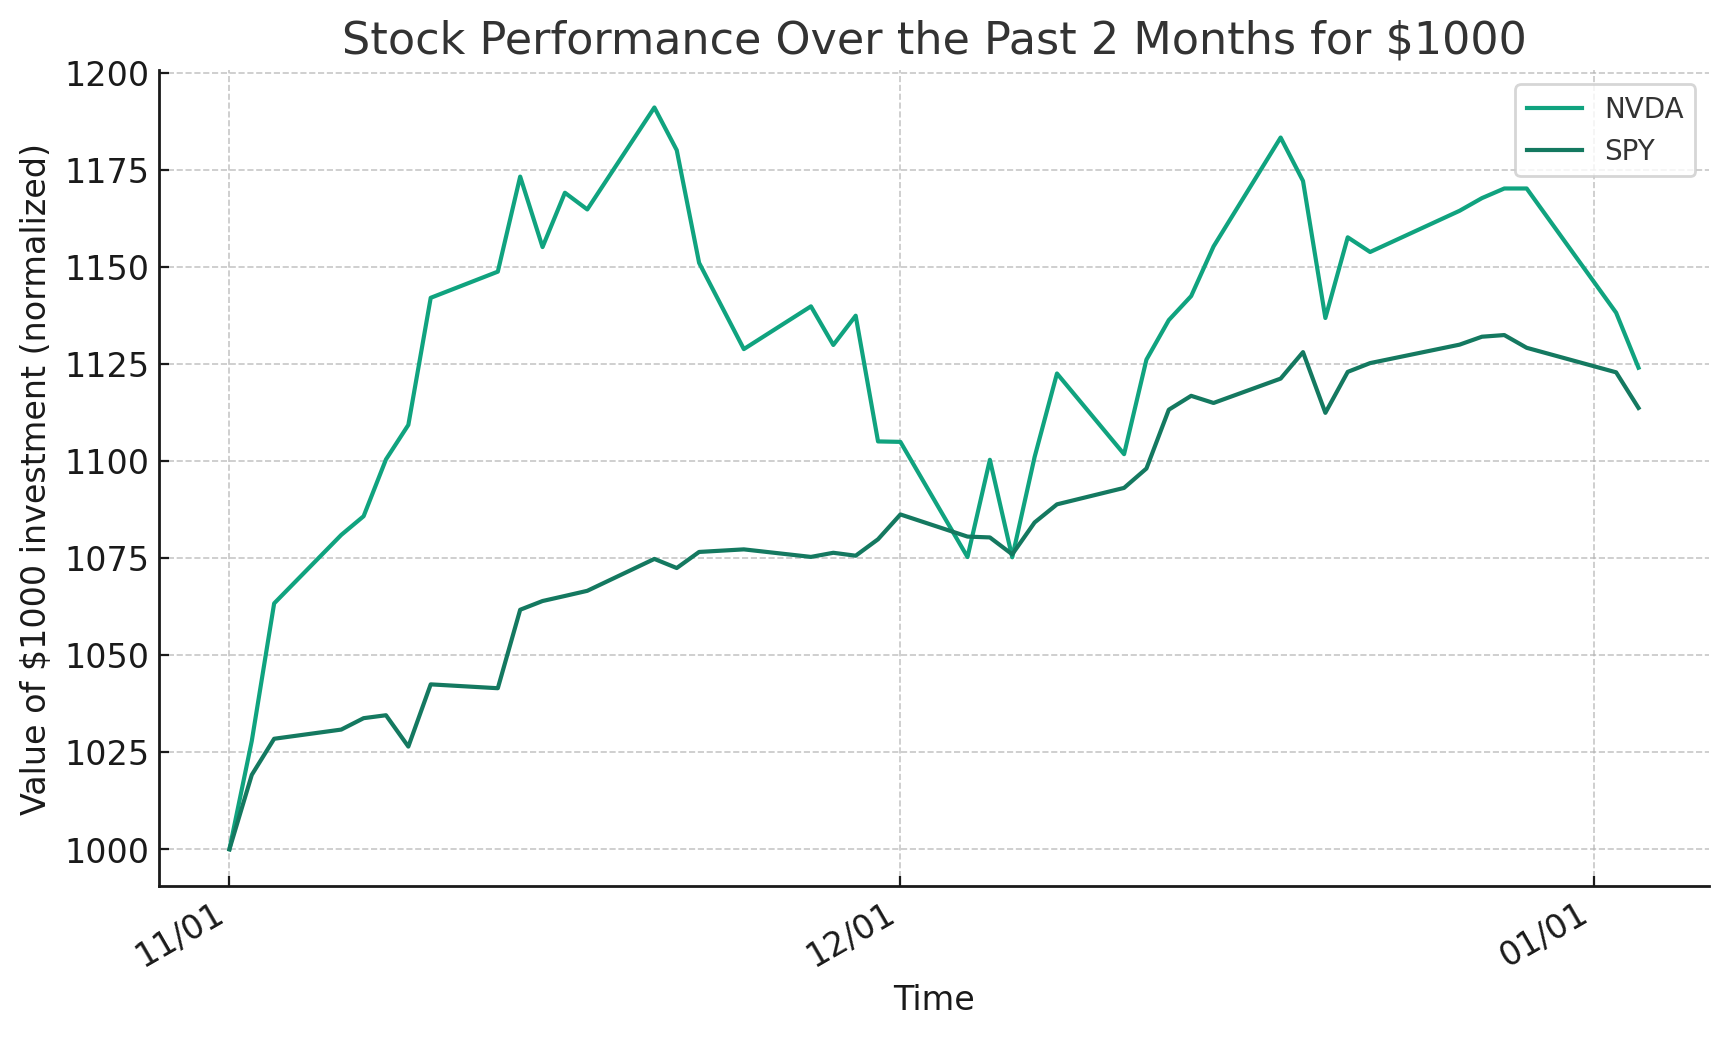

Here is the normalized chart depicting the performance of NVDA and SPY stocks over the past 2 months for an initial investment of $1000:

From the chart, we can observe that both stocks have shown some level of volatility over the two-month period. It's important to note that the prices have been normalized to represent what $1000 invested at the start of the two-month window would look like over time.

NVDA stock seems to be more volatile as compared to SPY, which seems to show a more consistent upward trend over these two months. However, NVDA also seems to have given higher returns compared to SPY.

Please let me know if you need any further analysis or explanations.


In [22]:
# handle response with image
image_no = 1
for content in response.content:
    if hasattr(content, 'image_file'):
        print("it's an image")
        image_data = client.files.content(content.image_file.file_id)
        image_data_bytes = image_data.read()

        file_path = f"./my-image-{str(image_no)}.png"
        with open(file_path, "wb") as file:
            file.write(image_data_bytes)
        display(Image(filename=file_path, embed=True))
        image_no += 1
    else:
        print(content.text.value)

In [7]:
# find run
runs = client.beta.threads.runs.list(thread_id)
runs

SyncCursorPage[Run](data=[Run(id='run_QZttaNcJPHD6ysXmCPINzknG', assistant_id='asst_MNdpNOqw6o9LFi9LiP4ejH5y', cancelled_at=None, completed_at=None, created_at=1704411346, expires_at=None, failed_at=1704411386, file_ids=[], instructions='You are a finance data analyst who takes requests for charts in english and returns graphical representations using your code interpreter. You return visually appealing graphs along with an explanation of the chart. Messages sent to you will have the relevant date and will either be requests for new charts or requests for further explanations and modifications.', last_error=LastError(code='rate_limit_exceeded', message='Rate limit reached for gpt-4 in organization org-dPFFj7FI2zyX7cQoMBGzoCyu on tokens_usage_based per min: Limit 10000, Used 6274, Requested 4992. Please try again in 7.595s. Visit https://platform.openai.com/account/rate-limits to learn more.'), metadata={}, model='gpt-4', object='thread.run', required_action=None, started_at=1704411349,

In [8]:
run_id = runs.data[0].id

In [10]:
# run = client.beta.threads.runs.cancel(thread_id = thread_id, run_id = run_id)

In [10]:
# list messages to see if deleting needed
messages = client.beta.threads.messages.list(thread_id)
messages

SyncCursorPage[ThreadMessage](data=[ThreadMessage(id='msg_NW9egkMiNDgwQkN6M0MfWjyx', assistant_id='asst_MNdpNOqw6o9LFi9LiP4ejH5y', content=[MessageContentText(text=Text(annotations=[], value='Apologies for the confusion, I made a mistake by referencing the wrong variable. Let me fix this and retry.'), type='text')], created_at=1704411380, file_ids=[], metadata={}, object='thread.message', role='assistant', run_id='run_QZttaNcJPHD6ysXmCPINzknG', thread_id='thread_OadiFqrrypJQsvP0mUAJC7nd'), ThreadMessage(id='msg_AzVv96LguSPmZ5Jya5ZNYnXa', assistant_id='asst_MNdpNOqw6o9LFi9LiP4ejH5y', content=[MessageContentText(text=Text(annotations=[], value='Sorry, it seems there was a typo in the code. Let me correct it and try again.'), type='text')], created_at=1704411370, file_ids=[], metadata={}, object='thread.message', role='assistant', run_id='run_QZttaNcJPHD6ysXmCPINzknG', thread_id='thread_OadiFqrrypJQsvP0mUAJC7nd'), ThreadMessage(id='msg_lPgTX65rQsNCs4Li9zc5t9oq', assistant_id=None, content

In [11]:
# delete thread
response = client.beta.threads.delete(thread_id)
response

ThreadDeleted(id='thread_OadiFqrrypJQsvP0mUAJC7nd', deleted=True, object='thread.deleted')